***
# Starting Kit - Black Swan HiggsML Course
***

In [1]:
COLAB = "google.colab" in str(get_ipython())

In [2]:
if COLAB:
    ! git clone --depth 1 https://github.com/blackSwanCS/Higgs_collaboration_B.git
    ! git status
    %cd /Higgs_collaboration_B

In [3]:
# HiggsML utility package should not be modified
%pip install HiggsML

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


### Imports

In [4]:
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys

warnings.filterwarnings("ignore")

### Directories

In [5]:
root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Root directory is c:\Users\Lenovo\Desktop\CS 1A\ST4 - Black Swan Detection\EI\Higgs_collaboration_B


## Import Submission Model
We import a class named `Model` from the submission file (`model.py`). This `Model` class has the following methods:
- `init`: receives train set and systematics class as input
- `fit`: can be used for training
- `predict`: receives one test set and outputs a dictionary with the following keys
    - `mu_hat` : predicted mu $\hat{\mu}$
    - `delta_mu_hat`: $\Delta{\hat{\mu}}$ bound for $\mu$
    - `p16`: 16th percentile
    - `p84`: 84th percentile

In this example code, the `Model` class implements a basic model with 2 different model trained to predict the class label. 

* 1 XGBoost BDT ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/boosted_decision_tree.py) )
* 2 Tebsorflow NN  ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/neural_network.py) )

The feature engineering is in where you can include derived quantities and decide which feature should be needed. ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/feature_engineering.py) ) 

the statistical analysis part is where yoiu write the mu finding calculation using the output of the classifier. ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/statistical_analysis.py) ) 

If running in Collab, click the folder icon in the left sidebar to open the file browser.


In [6]:
path.append(submission_dir)
from sample_code_submission.model import Model

## Data
### Available data sets
1. blackSwan_data
2. sample_data
3. neurips2024_data 

In [7]:
from HiggsML.datasets import download_dataset

data = download_dataset(
    "blackSwan_data"
)  # change to "blackSwan_data" for the actual data

2025-06-04 11:01:04,021 - HiggsML.datasets     - INFO     - Handling as dataset name: blackSwan_data
2025-06-04 11:01:04,021 - HiggsML.datasets     - INFO     - Current working directory: c:\Users\Lenovo\Desktop\CS 1A\ST4 - Black Swan Detection\EI\Higgs_collaboration_B
2025-06-04 11:01:04,028 - HiggsML.datasets     - INFO     - Total rows: 2000000
2025-06-04 11:01:04,030 - HiggsML.datasets     - INFO     - Test size: 600000


### ⚠️ Note:
The data used here is a small subset of the full data is for demonstration only to get a view of what the data looks like. 

In [8]:
# load train set
data.load_train_set()
data_set = data.get_train_set()
print(data_set)

2025-06-04 11:01:04,317 - HiggsML.datasets     - INFO     - Selected train size: 1400000
2025-06-04 11:01:05,321 - HiggsML.datasets     - INFO     - Data loaded successfully


         PRI_lep_pt  PRI_lep_eta  PRI_lep_phi  PRI_had_pt  PRI_had_eta  \
0         37.472000        0.676       -1.520   46.752998        0.623   
1         26.006001       -0.087       -1.412   60.009998       -0.290   
2         20.622999       -0.922       -0.436   41.917999       -1.356   
3         48.394001        0.202        0.816   27.916000       -0.552   
4         39.840000       -0.005        1.487   30.997000        1.747   
...             ...          ...          ...         ...          ...   
1399995   28.957001        0.489       -1.468   31.007000       -1.381   
1399996   23.759001       -0.805        2.832   35.183998       -0.923   
1399997   29.795000        0.429        0.363   33.636002        0.731   
1399998   48.626999        1.340        0.538   73.736000        0.437   
1399999   33.832001        1.496        0.137   35.353001        1.300   

         PRI_had_phi  PRI_jet_leading_pt  PRI_jet_leading_eta  \
0              1.500          -25.000000      

***
## Visualize the Data Set
***

In [9]:
from tabulate import tabulate

target = data_set["labels"]
weights = data_set["weights"]
detailed_label = data_set["detailed_labels"]
keys = np.unique(detailed_label)


weight_keys = {}
average_weights = {}
for key in keys:
    weight_keys[key] = weights[detailed_label == key]

table_data = []
for key in keys:
    table_data.append(
        [
            key,
            np.sum(weight_keys[key]),
            len(weight_keys[key]),
            np.mean(weight_keys[key]),
        ]
    )

table_data.append(
    [
        "Total Signal",
        np.sum(weights[target == 1]),
        len(weights[target == 1]),
        np.mean(weights[target == 1]),
    ]
)
table_data.append(
    [
        "Total Background",
        np.sum(weights[target == 0]),
        len(weights[target == 0]),
        np.mean(weights[target == 0]),
    ]
)


print("[*] --- Detailed Label Summary")
print(
    tabulate(
        table_data,
        headers=[
            "Detailed Label",
            "Total Weight",
            "Number of events",
            "Average Weight",
        ],
        tablefmt="grid",
    )
)

[*] --- Detailed Label Summary
+------------------+----------------+--------------------+------------------+
| Detailed Label   |   Total Weight |   Number of events |   Average Weight |
+==================+================+====================+==================+
| diboson          |        382.109 |               3406 |       0.112187   |
+------------------+----------------+--------------------+------------------+
| htautau          |        675.897 |             462981 |       0.00145988 |
+------------------+----------------+--------------------+------------------+
| ttbar            |       4404.72  |              39293 |       0.112099   |
+------------------+----------------+--------------------+------------------+
| ztautau          |     100256     |             894320 |       0.112103   |
+------------------+----------------+--------------------+------------------+
| Total Signal     |        675.897 |             462981 |       0.00145988 |
+------------------+-------------

In [10]:
print("\n[*] --- Examples of all features\n")
display(data_set.head())


[*] --- Examples of all features



,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,...,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_had_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_met_phi_centrality,DER_lep_eta_centrality
0,37.472000,0.676,-1.520,46.752998,0.623,1.500,-25.000000,-25.000,-25.000,-25.000,...,30.256184,-25.000,-25.000000,-25.000000,3.020465,30.256184,84.224998,0.801489,1.365776,-25.000000
1,26.006001,-0.087,-1.412,60.009998,-0.290,-0.099,134.770996,0.350,2.894,49.673,...,124.359779,2.009,232.705902,-0.580650,1.328600,9.316307,270.459991,0.433361,1.413247,0.726747
2,20.622999,-0.922,-0.436,41.917999,-1.356,2.524,-25.000000,-25.000,-25.000,-25.000,...,10.601603,-25.000,-25.000000,-25.000000,2.991648,10.601603,62.541000,0.491984,1.315526,-25.000000
3,48.394001,0.202,0.816,27.916000,-0.552,-2.387,-25.000000,-25.000,-25.000,-25.000,...,10.455322,-25.000,-25.000000,-25.000000,3.171129,10.455322,76.309998,1.733558,-1.409702,-25.000000
4,39.840000,-0.005,1.487,30.997000,1.747,2.681,73.082001,3.369,-1.286,31.274,...,92.074677,3.370,254.889191,-0.003369,2.120175,6.207835,175.192993,1.285286,1.037429,0.366135


In [11]:
print("\n[*] --- Description of all features\n")
display(data_set.describe())


[*] --- Description of all features



,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,...,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_had_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_met_phi_centrality,DER_lep_eta_centrality
count,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,...,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06,1.400000e+06
mean,3.396482e+01,-1.664071e-03,3.532688e-04,4.310186e+01,-1.059442e-03,-7.431224e-04,2.039557e+01,-1.315356e+01,-1.315217e+01,-8.396195e+00,...,4.182135e+01,-1.887505e+01,5.100177e+01,-1.941999e+01,2.738726e+00,1.806350e+01,1.273698e+02,8.796806e-01,2.691063e-01,-1.930729e+01
std,1.806436e+01,1.223419e+00,1.813047e+00,2.134356e+01,1.246117e+00,1.813856e+00,6.307355e+01,1.255423e+01,1.254495e+01,3.432262e+01,...,5.431841e+01,1.143358e+01,2.382271e+02,1.057919e+01,6.103445e-01,1.601432e+01,1.094018e+02,5.094582e-01,1.217131e+00,1.060158e+01
min,2.000000e+01,-2.500000e+00,-3.142000e+00,2.287700e+01,-2.690000e+00,-3.142000e+00,-2.500000e+01,-2.500000e+01,-2.500000e+01,-2.500000e+01,...,1.173875e-02,-2.500000e+01,-2.500000e+01,-2.500000e+01,5.641427e-01,1.173875e-02,4.304400e+01,3.400616e-02,-1.414214e+00,-2.500000e+01
25%,2.395100e+01,-9.520000e-01,-1.568000e+00,3.077000e+01,-9.770000e-01,-1.572000e+00,-2.500000e+01,-2.500000e+01,-2.500000e+01,-2.500000e+01,...,1.094507e+01,-2.500000e+01,-2.500000e+01,-2.500000e+01,2.509546e+00,8.491425e+00,6.449300e+01,5.891082e-01,-1.332358e+00,-2.500000e+01
50%,2.901600e+01,-1.000000e-03,1.000000e-03,3.816800e+01,-1.000000e-03,3.000000e-03,-2.500000e+01,-2.500000e+01,-2.500000e+01,-2.500000e+01,...,2.156595e+01,-2.500000e+01,-2.500000e+01,-2.500000e+01,2.957897e+00,1.439308e+01,8.531300e+01,7.759828e-01,9.866624e-01,-2.500000e+01
75%,3.716600e+01,9.500000e-01,1.572000e+00,4.813200e+01,9.730000e-01,1.570000e+00,4.706200e+01,-1.560000e-01,-1.780000e-01,-2.500000e+01,...,4.885020e+01,-2.500000e+01,-2.500000e+01,-2.500000e+01,3.127119e+00,2.271586e+01,1.433570e+02,1.024202e+00,1.385667e+00,-2.500000e+01
max,1.101770e+03,2.500000e+00,3.142000e+00,8.452980e+02,2.680000e+00,3.142000e+00,1.203860e+03,4.991000e+00,3.142000e+00,1.001000e+03,...,1.175087e+03,9.666000e+00,6.555388e+03,2.229731e+01,5.804204e+00,7.199706e+02,2.497039e+03,2.160489e+01,1.414214e+00,1.000000e+00


[*] --- PRI_lep_phi histogram
[*] --- PRI_met histogram
[*] --- DER_mass_vis histogram
[*] --- DER_deltaeta_jet_jet histogram


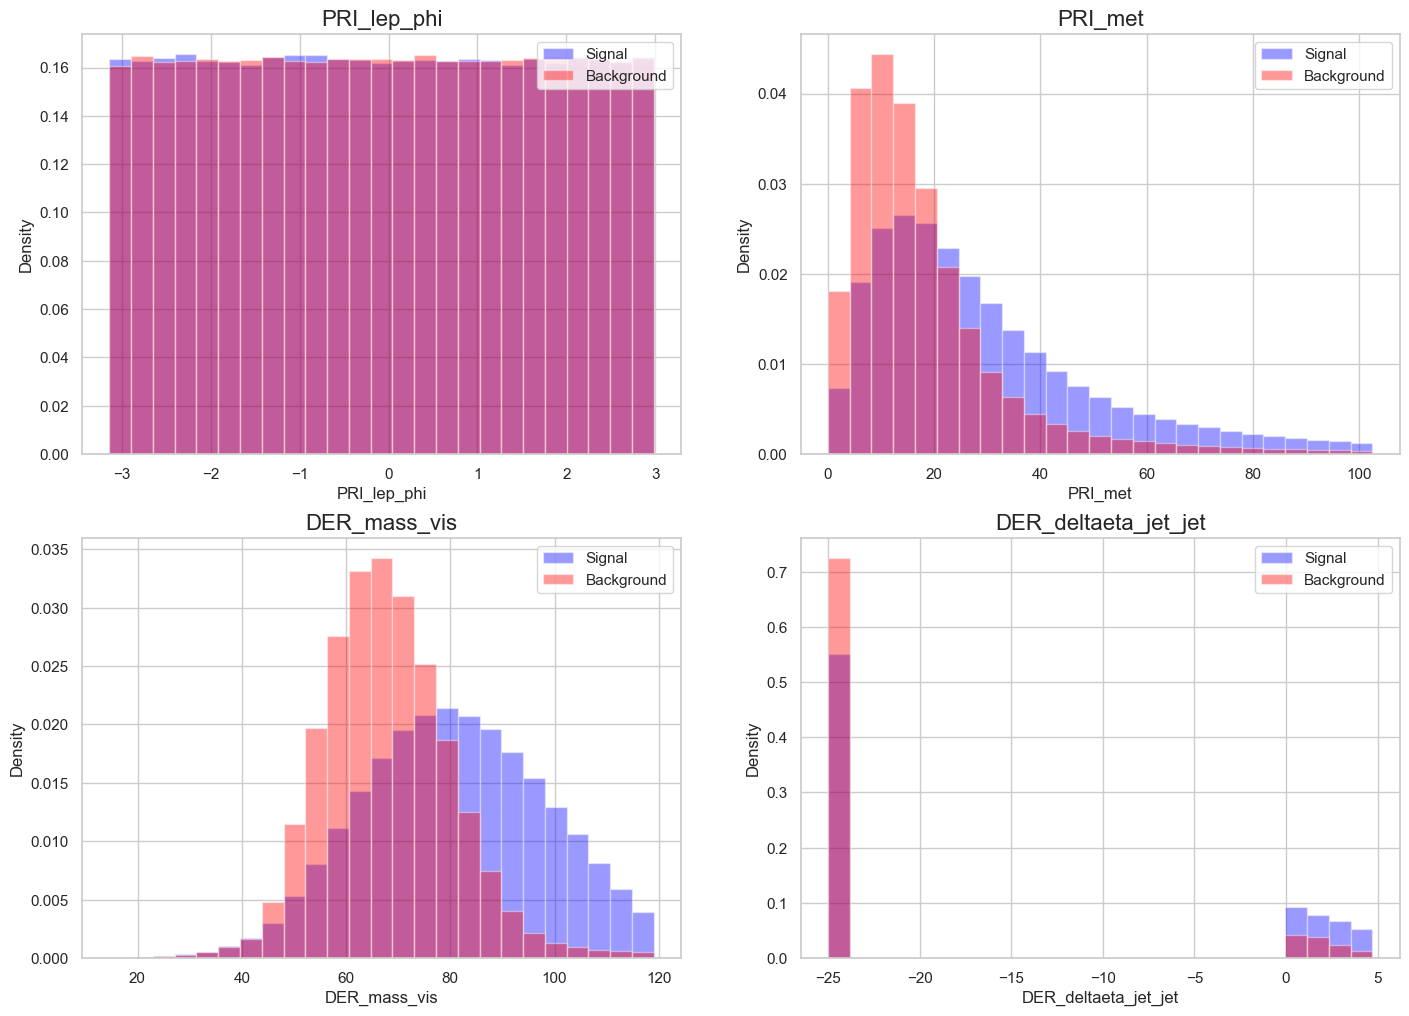

In [12]:
from utils import histogram_dataset

# this function is defined in utils.py in the sample_code_submission directory. feel free to modify it as needed

histogram_dataset(
    data_set,
    target,
    weights,
    columns=["PRI_lep_phi", "PRI_met", "DER_mass_vis", "DER_deltaeta_jet_jet"],
)

Signal feature  correlation matrix


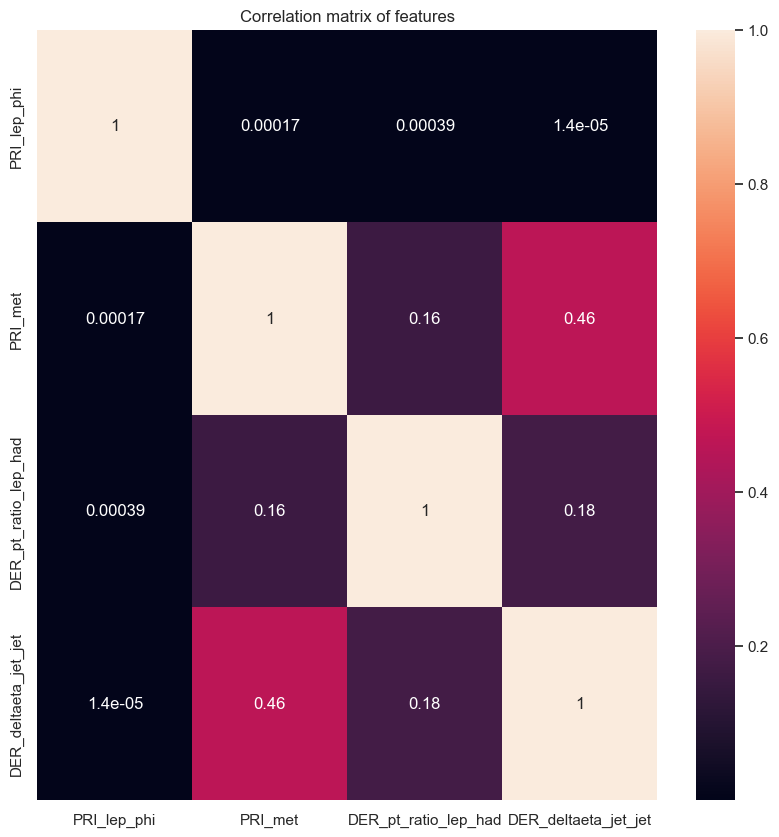

Background feature  correlation matrix


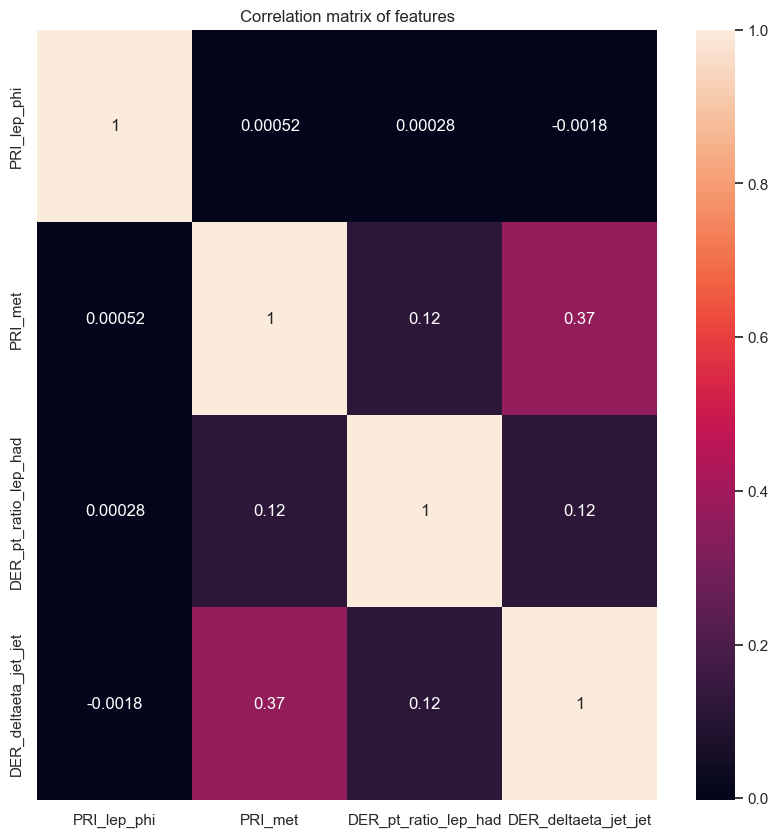

In [13]:
import seaborn as sns

sns.set_theme(rc={"figure.figsize": (10, 10)}, style="whitegrid")

caption = ["Signal feature", "Background feature"]

for i in range(2):

    dfplot = pd.DataFrame(
        data_set,
        columns=[
            "PRI_lep_phi",
            "PRI_met",
            "DER_pt_ratio_lep_had",
            "DER_deltaeta_jet_jet",
        ],
    )

    print(caption[i], " correlation matrix")
    corrMatrix = dfplot[target == i].corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.title("Correlation matrix of features")
    plt.show()

del dfplot

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


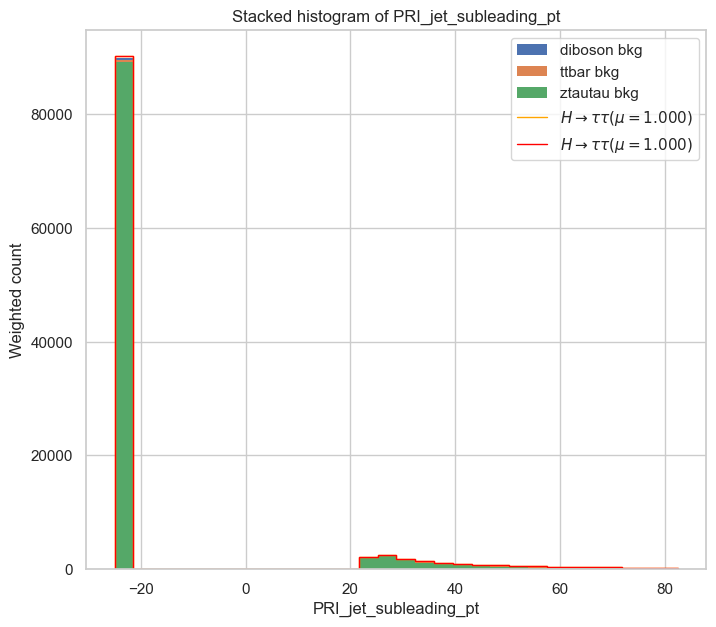

In [14]:
from HiggsML.visualization import stacked_histogram

stacked_histogram(data_set, target, weights, detailed_label, "PRI_jet_subleading_pt")

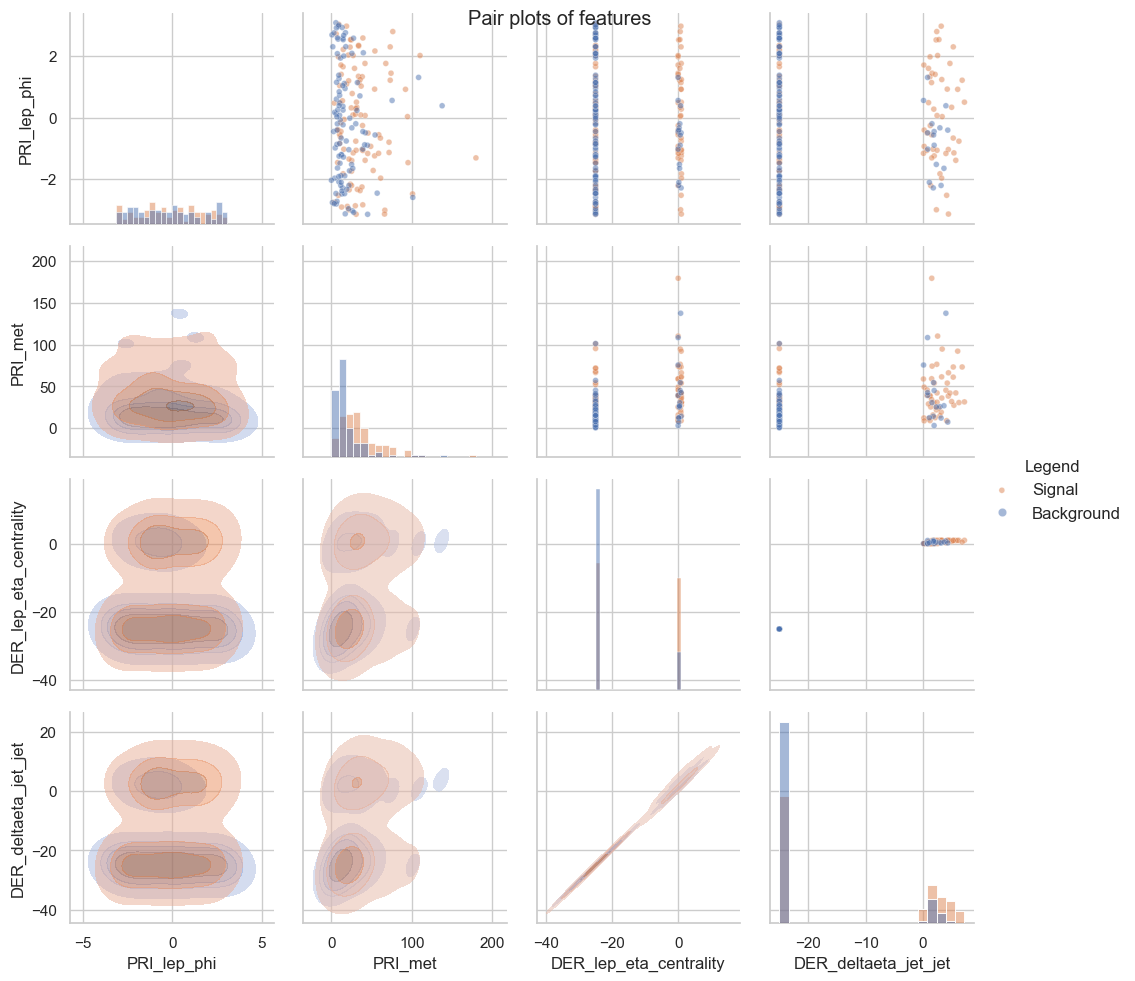

In [15]:
from HiggsML.visualization import pair_plots

# Show data summary
pair_plots(
    data_set,
    target,
    sample_size=100,
    columns=[
        "PRI_lep_phi",
        "PRI_met",
        "DER_lep_eta_centrality",
        "DER_deltaeta_jet_jet",
    ],
)

### Test Settings
The Test setting sets the test conditions in ingestion.
This includes what systematics you want and how many psuedo experiments you want. 

In [16]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 25,  # Number of pseudo-experiments to run per set
    "num_of_sets": 25,  # Number of sets of pseudo-experiments to run
}

RANDOM_SEED = 42

In [17]:
test_settings = TEST_SETTINGS.copy()

random_state = np.random.RandomState(RANDOM_SEED)
test_settings["ground_truth_mus"] = (
    random_state.uniform(0.1, 3, test_settings["num_of_sets"])
).tolist()

random_settings_file = os.path.join(output_dir, "test_settings.json")
with open(random_settings_file, "w") as f:
    json.dump(test_settings, f)

### Ingestion



In [18]:
from HiggsML.ingestion import Ingestion

ingestion = Ingestion(data)

In [19]:
# initialize submission
ingestion.init_submission(Model, "BDT")

2025-06-04 11:01:27,621 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-06-04 11:01:27,622 - HiggsML.datasets     - INFO     - Selected train size: 5000
2025-06-04 11:01:27,922 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:27,937 - HiggsML.datasets     - INFO     - Selected train size: 5000


Training Data:  (5000, 28)
Training Labels:  (5000,)
Training Weights:  (5000,)
sum_signal_weights:  692.0265957282493
sum_bkg_weights:  105026.97340427173


2025-06-04 11:01:28,271 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:28,286 - HiggsML.datasets     - INFO     - Selected train size: 5000



Valid Data:  (5000, 28)
Valid Labels:  (5000,)
Valid Weights:  (5000,)
sum_signal_weights:  670.8388318857733
sum_bkg_weights:  105048.16116811425


2025-06-04 11:01:28,652 - HiggsML.datasets     - INFO     - Data loaded successfully



Holdout Data:  (5000, 28)
Holdout Labels:  (5000,)
Holdout Weights:  (5000,)
sum_signal_weights:  639.1571387354577
sum_bkg_weights:  105079.84286126454
 
 
Training Data:  (5000, 28)
DEBUG: model_type = 'BDT'
Pretrained model and scaler loaded successfully.
 Model is BDT


2025-06-04 11:01:30,607 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model


Model already loaded. We skip the training step.
score shape before threshold (4578,)
score shape after threshold (4578,)
saved_info {'beta': 9405.88236779465, 'gamma': 492.17734825544954, 'tes_fit': <function tes_fitter.<locals>.fit_function at 0x000001CC1899CF40>, 'jes_fit': <function jes_fitter.<locals>.fit_function at 0x000001CC11074180>}
Train Results: 
	 mu_hat  :  0.14619427561380854
	 del_mu_stat  :  0.20214053591010184
	 del_mu_sys  :  0.0
	 del_mu_tot  :  0.20214053591010184
Holdout Results: 
	 mu_hat  :  0.999999999999999
	 del_mu_stat  :  0.20214053591010184
	 del_mu_sys  :  0.0
	 del_mu_tot  :  0.20214053591010184
Valid Results: 
	 mu_hat  :  -0.9484976924493622
	 del_mu_stat  :  0.20214053591010184
	 del_mu_sys  :  0.0
	 del_mu_tot  :  0.20214053591010184
[*] --- score histogram


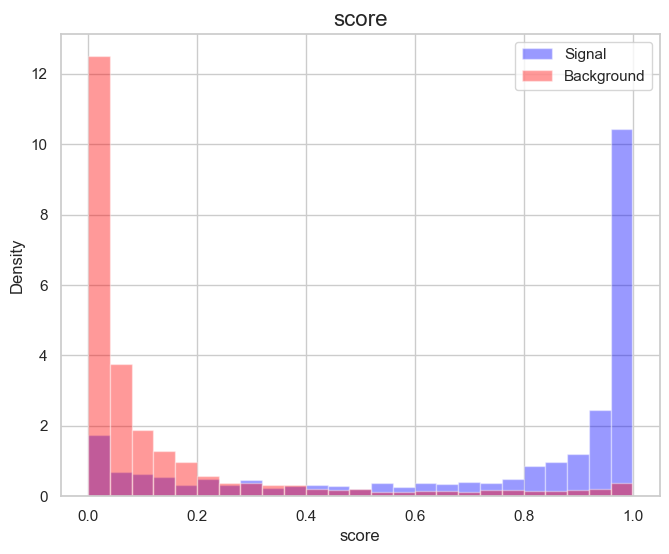

keys ['diboson' 'htautau' 'ttbar' 'ztautau']
keys 2 dict_keys(['diboson', 'htautau', 'ttbar', 'ztautau'])
htautau (30,)


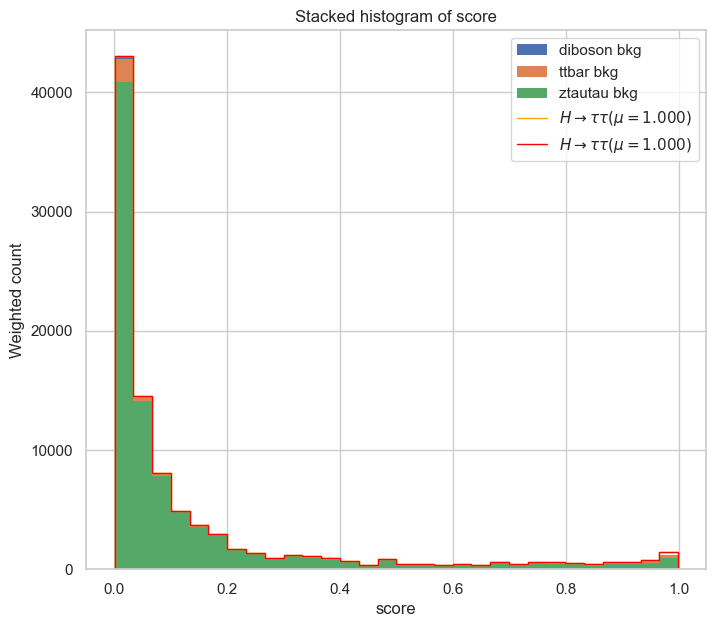

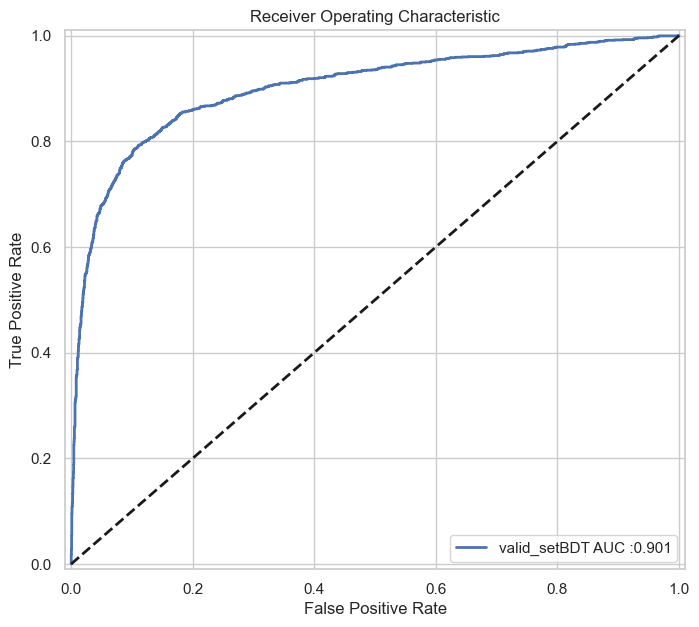

In [20]:
# fit submission
ingestion.fit_submission()

In [21]:
# load test set
data.load_test_set()

2025-06-04 11:01:32,594 - HiggsML.datasets     - INFO     - Data loaded successfully
2025-06-04 11:01:32,910 - HiggsML.datasets     - INFO     - Test data loaded successfully


In [ ]:
# predict submission
ingestion.predict_submission(test_settings)

KeyError: 0

In [ ]:
ingestion.process_results_dict()

In [ ]:
# save result
ingestion.save_result(output_dir)

## Score
1. Compute Scores
2. Visualize Scores


In [ ]:
from HiggsML.score import Scoring

In [ ]:
# Initialize Score
score = Scoring()

In [ ]:
print(output_dir)
score.load_ingestion_results(prediction_dir=output_dir, score_dir=output_dir)

c:\Users\Lenovo\Desktop\CS 1A\ST4 - Black Swan Detection\EI\Higgs_collaboration_B\sample_result_submission


2025-06-04 10:10:56,786 - HiggsML.score        - INFO     - Read ingestion results from c:\Users\Lenovo\Desktop\CS 1A\ST4 - Black Swan Detection\EI\Higgs_collaboration_B\sample_result_submission


2025-06-04 10:10:56,796 - HiggsML.score        - INFO     - Computing scores


[✔]


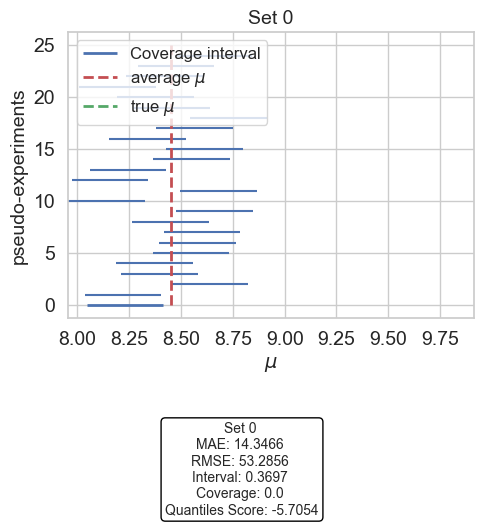

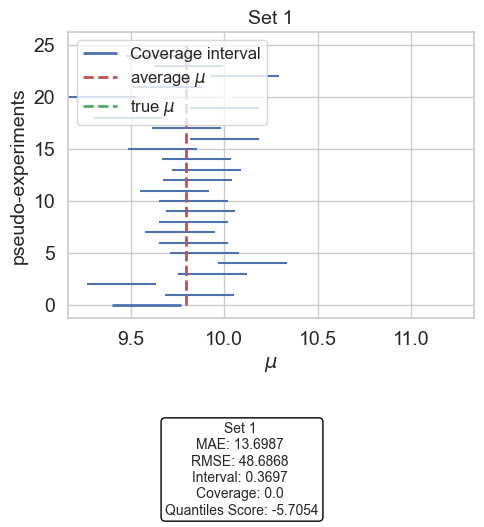

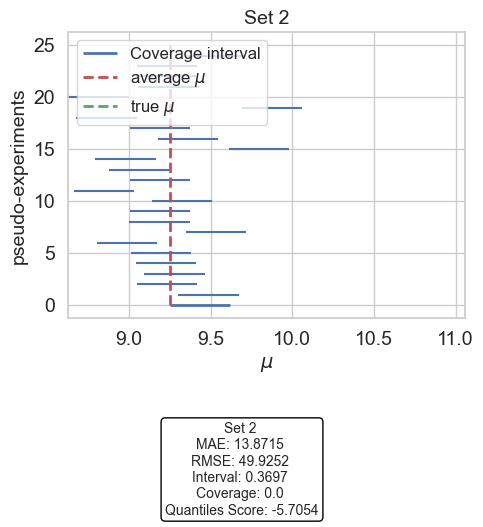

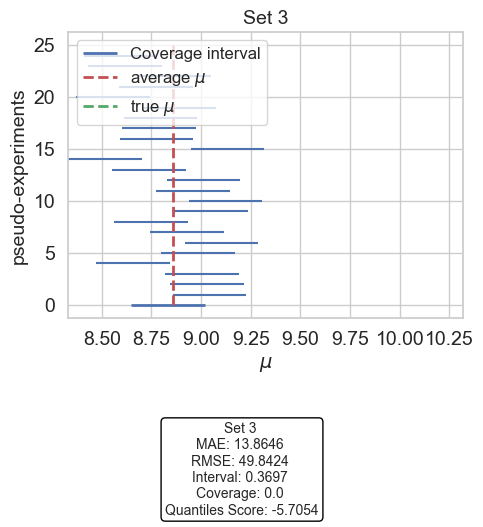

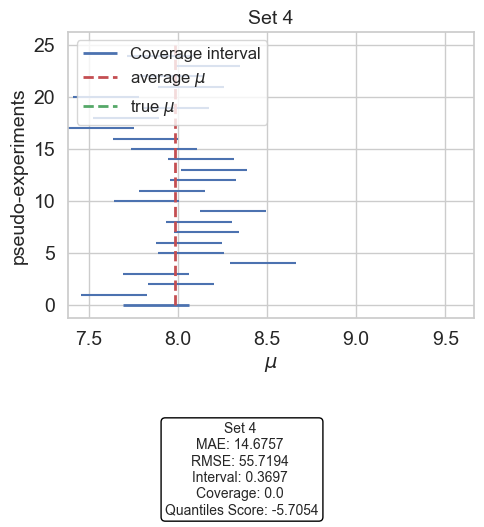

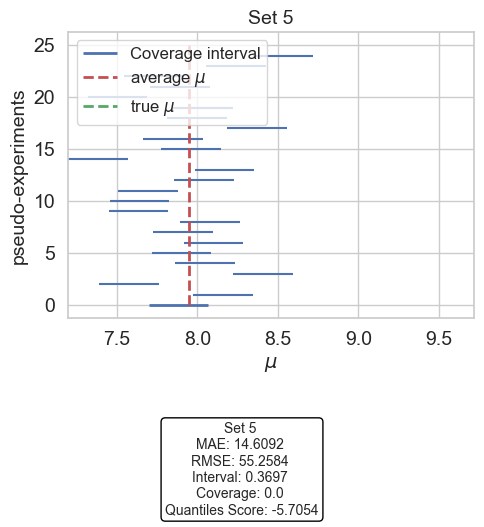

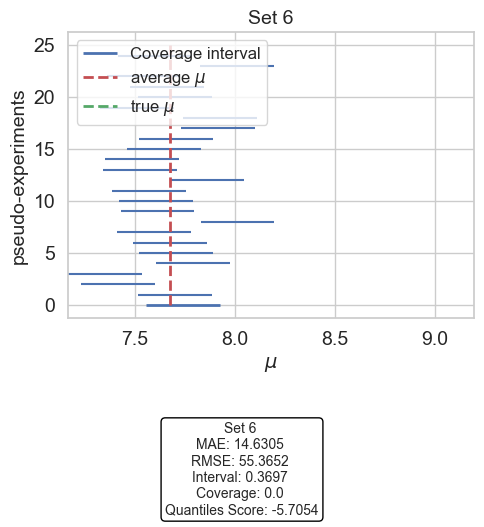

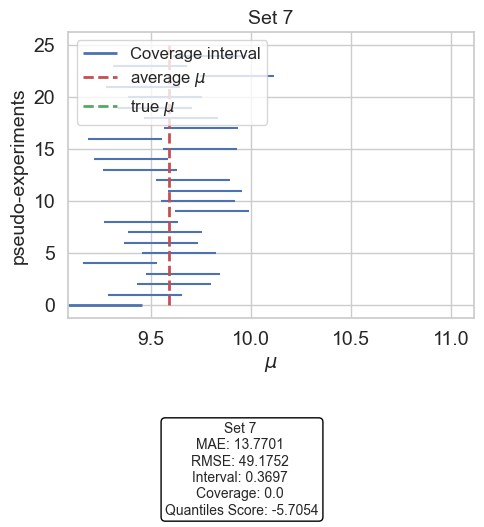

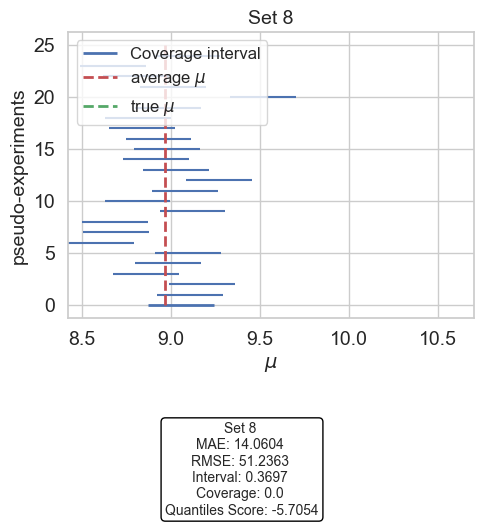

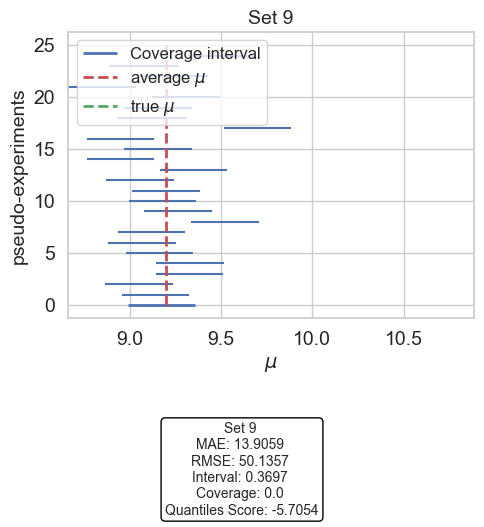

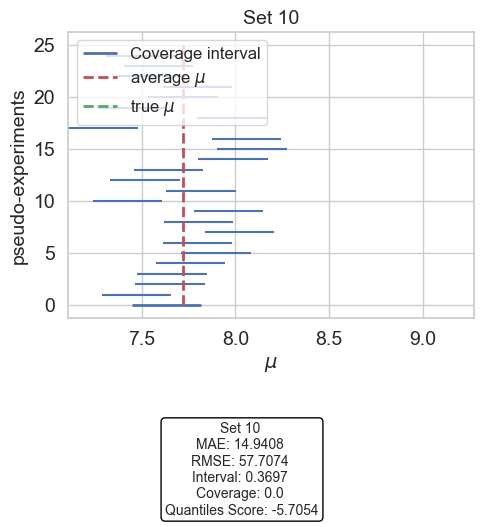

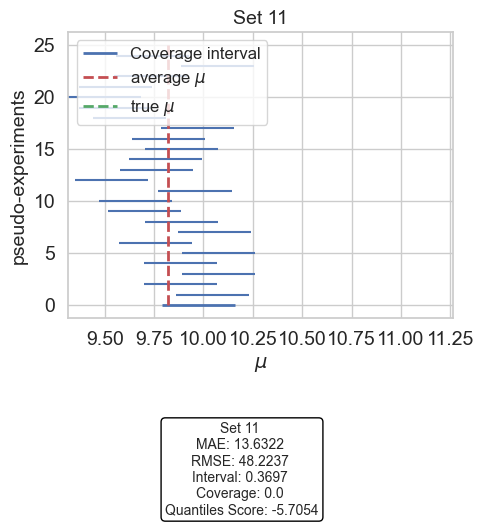

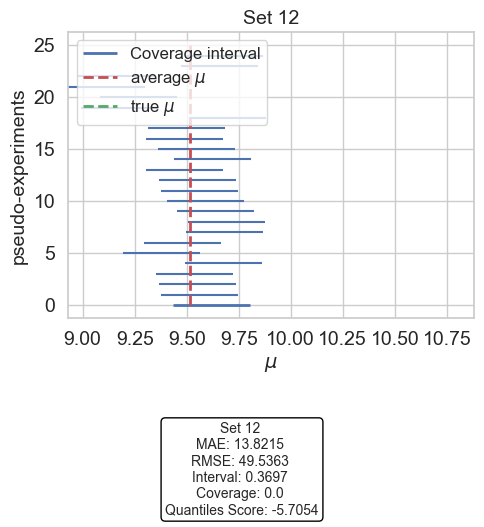

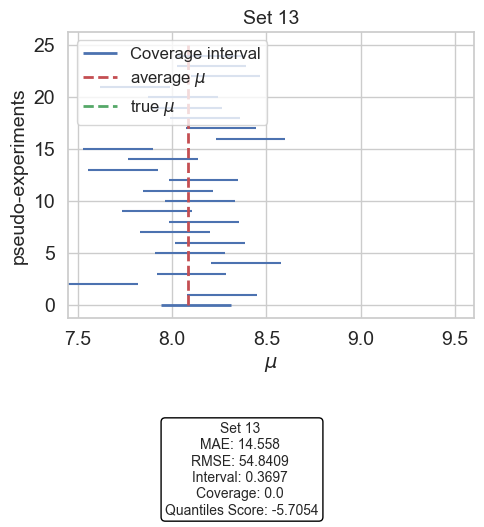

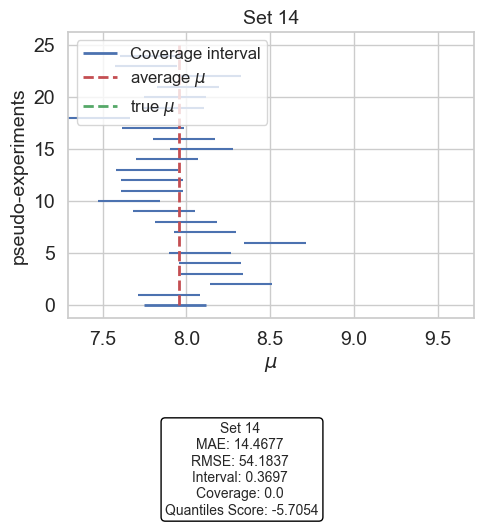

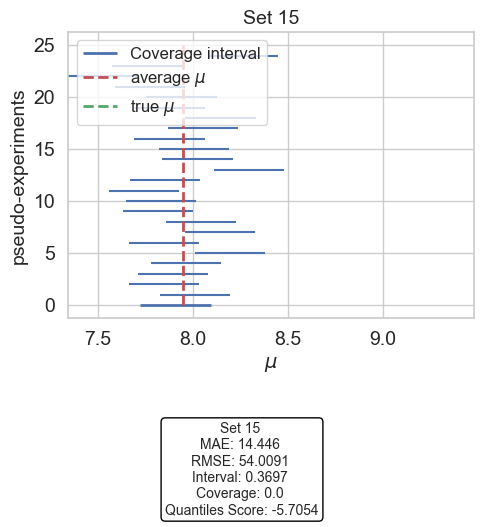

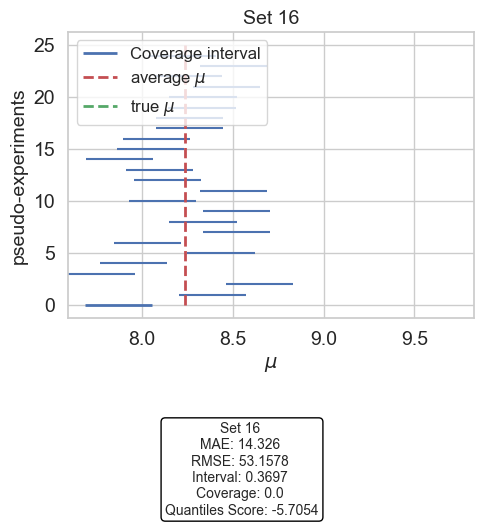

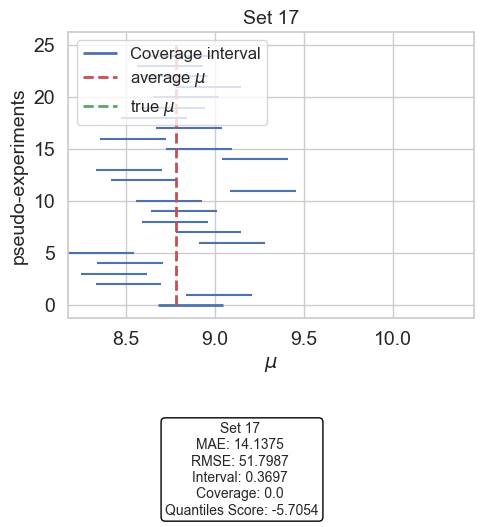

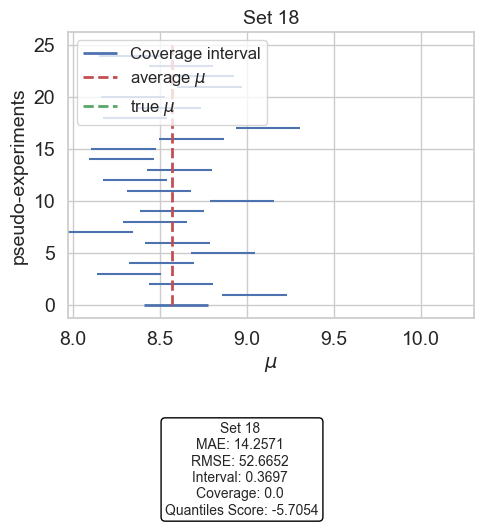

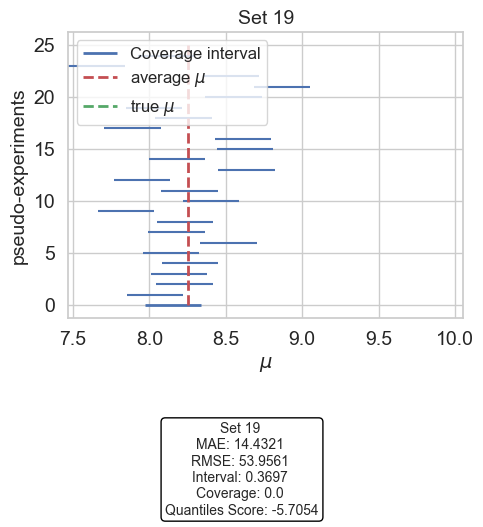

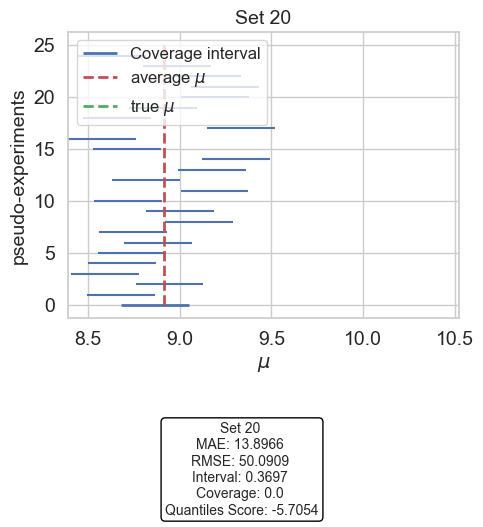

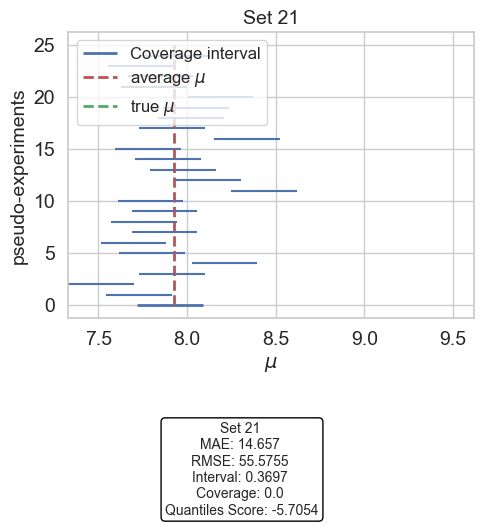

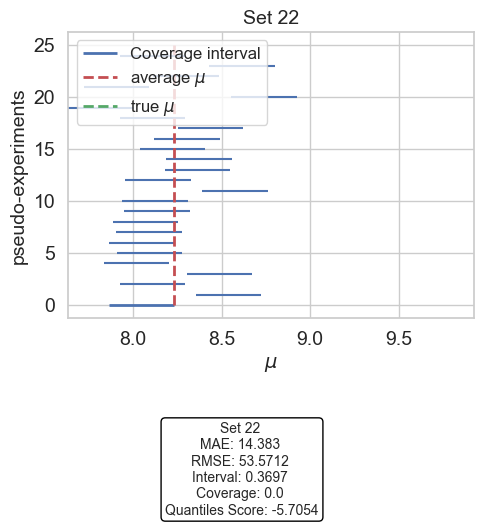

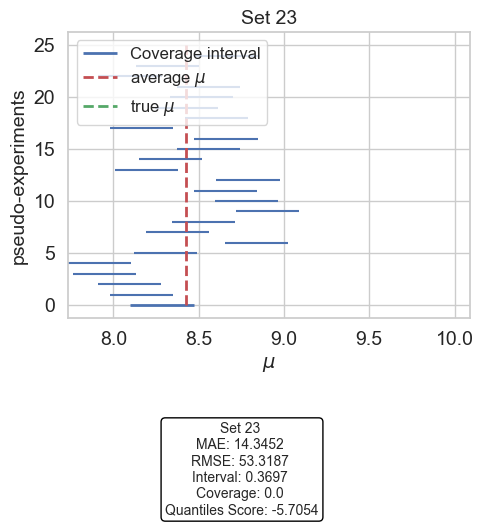

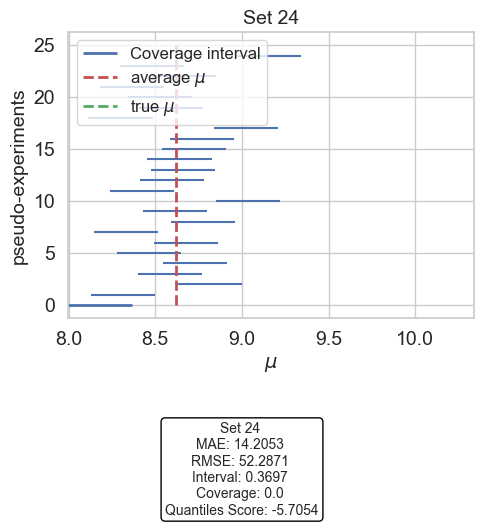

In [ ]:
# Compute Score
score.compute_scores(test_settings)

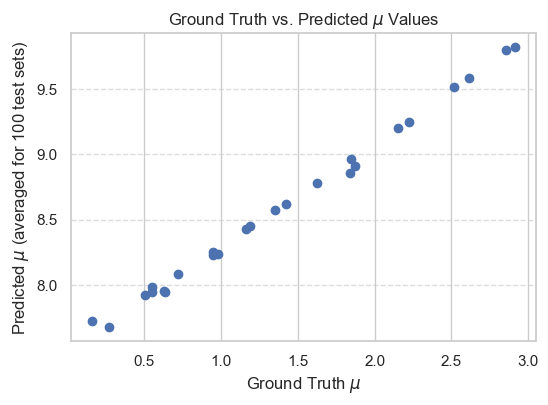

In [ ]:
from HiggsML.visualization import visualize_scatter

# Visualize scatter plot of ground truth mu and predicted mu
visualize_scatter(
    ingestion_result_dict=ingestion.results_dict,
    ground_truth_mus=test_settings["ground_truth_mus"],
)

In [ ]:
!python -m HiggsML.score --prediction $output_dir --output $output_dir

############################################
### Scoring Program
############################################



usage: score.py [-h] [--prediction PREDICTION] [--output OUTPUT]
                [--reference REFERENCE] [--codabench]
score.py: error: unrecognized arguments: 1A\ST4 - Black Swan Detection\EI\Higgs_collaboration_B\sample_result_submission 1A\ST4 - Black Swan Detection\EI\Higgs_collaboration_B\sample_result_submission


AUC test initial : 0.8815579484105696
labels                         1.000000
DER_sum_pt                     0.335441
PRI_jet_leading_pt             0.328052
DER_pt_h                       0.318961
PRI_jet_all_pt                 0.295555
PRI_jet_leading_phi            0.295215
PRI_jet_leading_eta            0.294962
PRI_n_jets                     0.293074
PRI_had_pt                     0.290931
DER_deltaeta_jet_jet           0.277700
PRI_met                        0.273048
DER_lep_eta_centrality         0.272535
PRI_jet_subleading_phi         0.270455
PRI_jet_subleading_eta         0.270025
PRI_jet_subleading_pt          0.265092
DER_mass_jet_jet               0.257096
DER_prodeta_jet_jet            0.253333
DER_mass_vis                   0.229315
PRI_lep_pt                     0.228859
DER_pt_tot                     0.171207
DER_met_phi_centrality         0.129928
DER_pt_ratio_lep_had           0.041759
DER_mass_transverse_met_lep    0.039576
PRI_had_phi                    0.000867
PR

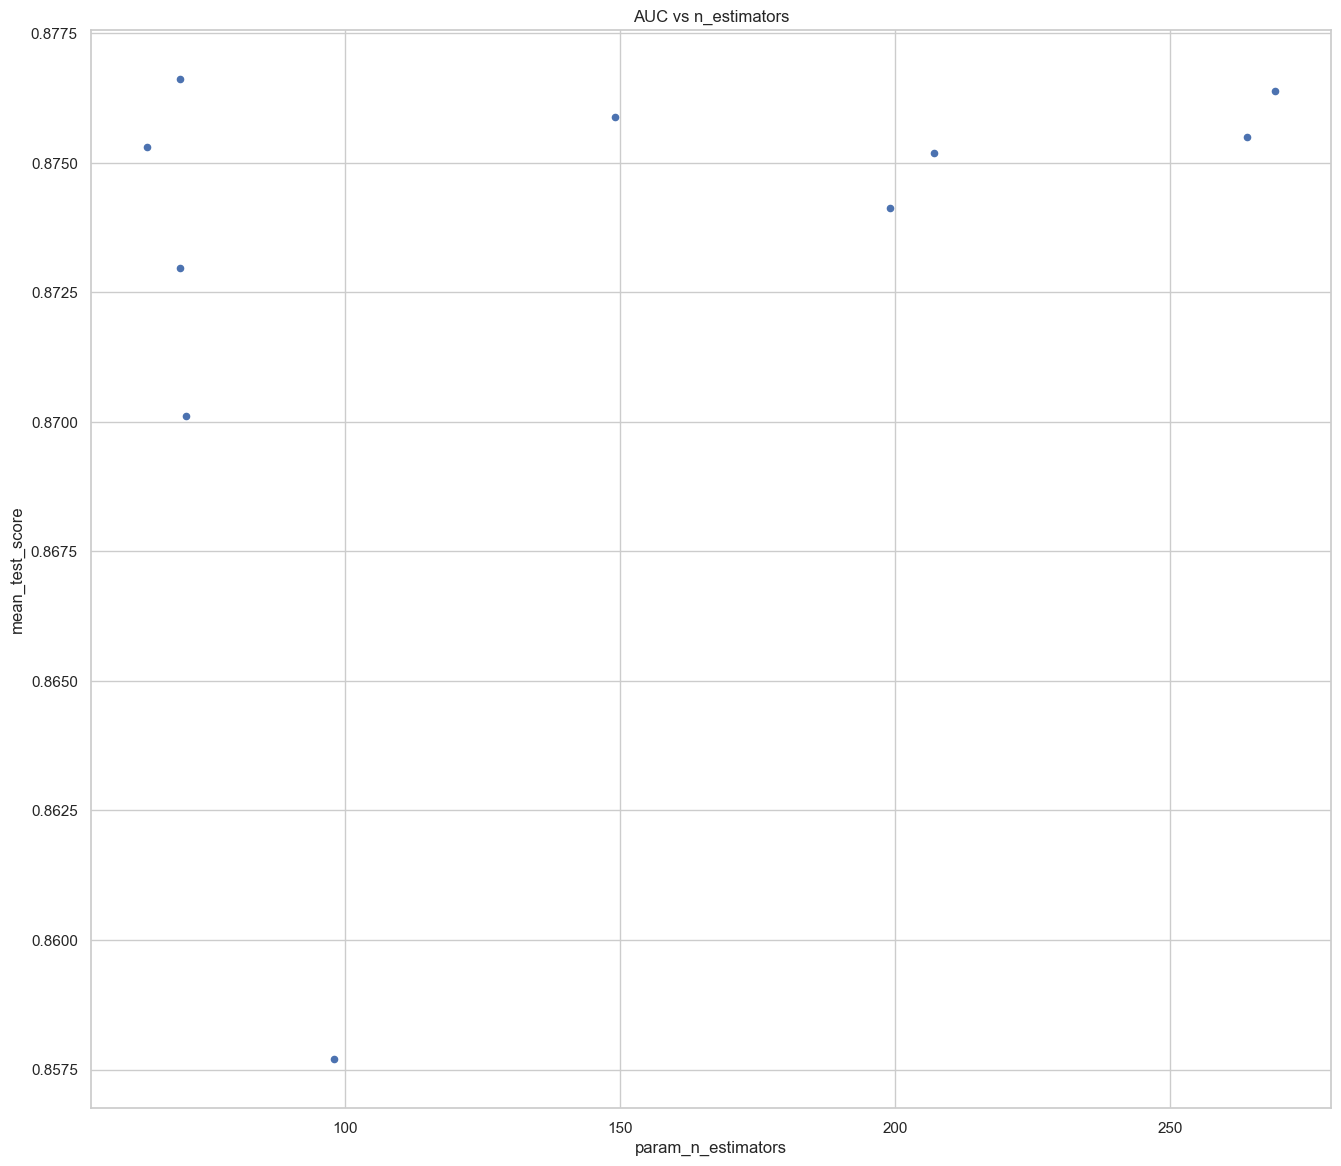

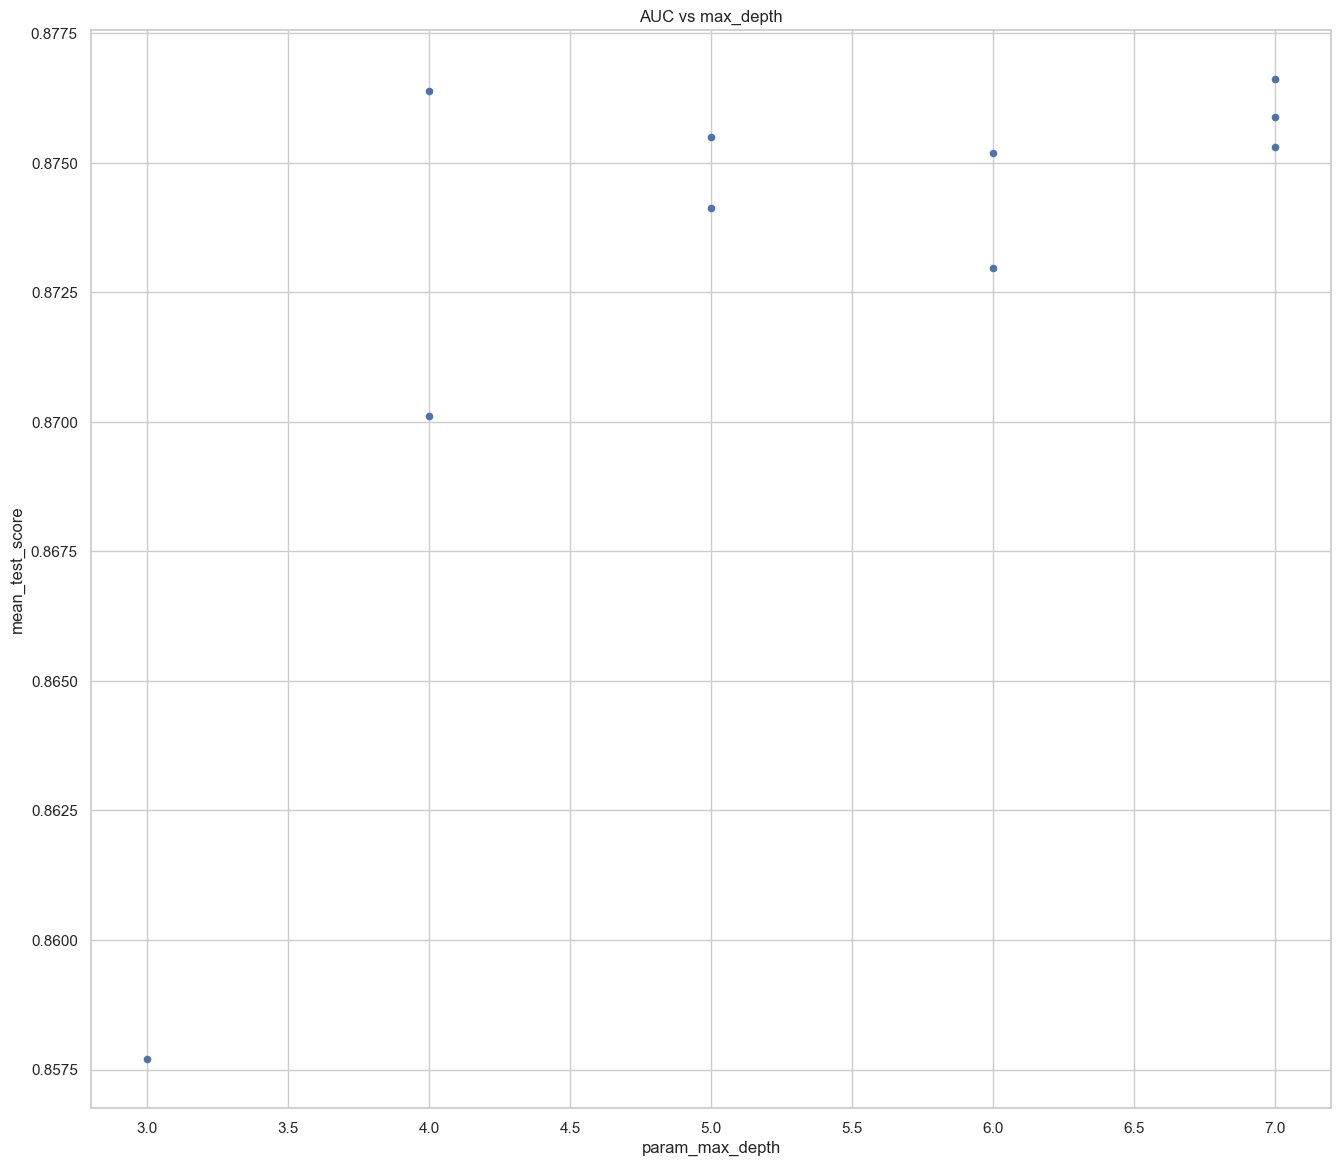

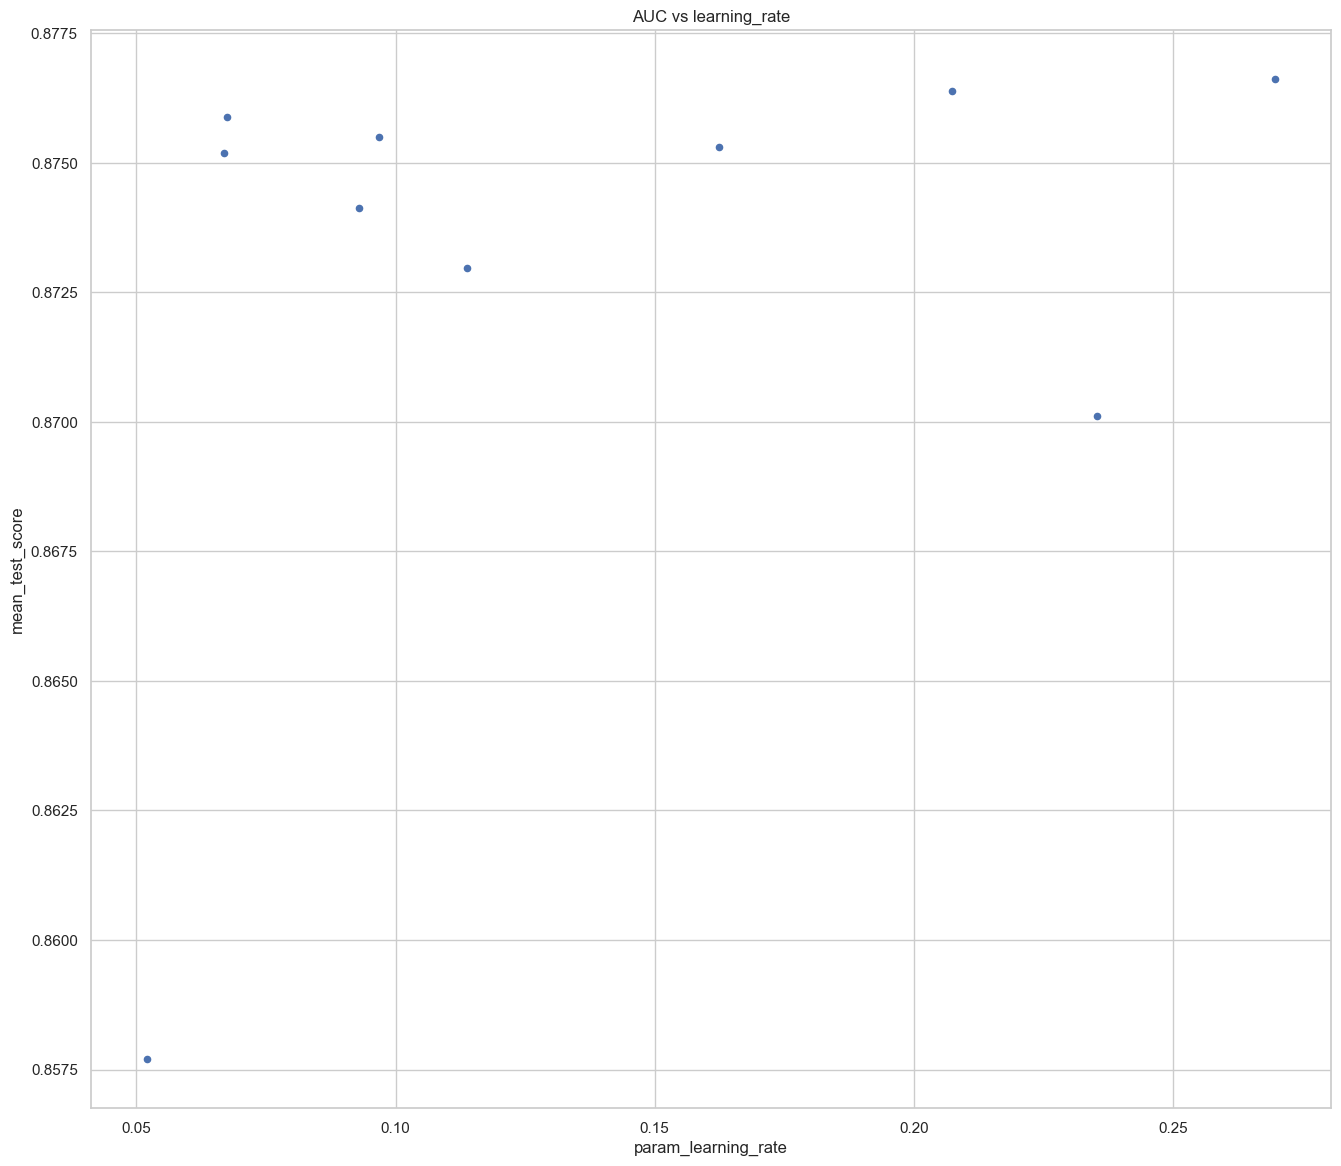

In [ ]:
from scipy import stats
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier

from sample_code_submission.boosted_decision_tree import significance_vscore


X = data_set.drop(columns=["labels", "weights","detailed_labels"]) 
y = data_set["labels"]
w = data_set["weights"]

# Split
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w, train_size=0.8, random_state=42
)

# Training OK maintenant
xgb = XGBClassifier()
xgb.fit(X_train, y_train,)
y_pred = xgb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred,)
print("AUC test initial :", auc)
corrs = data_set.corr(numeric_only=True)
print(corrs["labels"].sort_values(ascending=False))
# Fonction AMS si définie ailleurs dans le projet
try:
    ams = significance_vscore(y_test, y_pred, )
    print("Significance (AMS) test initial :", ams)
except:
    print("⚠️  Fonction significance_score non définie ici")

# Recherche aléatoire (HPO)
param_dist = {
    "max_depth": stats.randint(3, 9),
    "n_estimators": stats.randint(50, 300),
    "learning_rate": stats.uniform(0.05, 0.3)
}

xgb_model = XGBClassifier()
gsearch = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring="roc_auc",
    n_iter=10,
    cv=2,
    random_state=42
)

gsearch.fit(X_train, y_train, sample_weight=w_train)

print("\nBest parameters :", gsearch.best_params_)
print("Best ROC AUC (train CV) :", gsearch.best_score_)

# Évaluation du meilleur modèle sur le test set
y_pred_best = gsearch.predict_proba(X_test)[:, 1]
auc_best = roc_auc_score(y_test, y_pred_best, sample_weight=w_test)
print("AUC test (meilleur modèle) :", auc_best)

try:
    ams_best = significance_vscore(y_test, y_pred_best, sample_weight=w_test)
    print("Significance test (meilleur modèle) :", ams_best)
except:
    pass

# Visualisation des résultats de recherche
df_results = pd.DataFrame(gsearch.cv_results_)
df_results.plot.scatter("param_n_estimators", "mean_test_score", title="AUC vs n_estimators")
df_results.plot.scatter("param_max_depth", "mean_test_score", title="AUC vs max_depth")
df_results.plot.scatter("param_learning_rate", "mean_test_score", title="AUC vs learning_rate")
plt.show()